<a href="https://colab.research.google.com/github/kevinNdyabandiho/Labactivity1/blob/main/A_LabActivities.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Admission numbers: 123700, 122787, 100036, 116847, 123072** 

# **Lab Activity 1**

**1. FLEX ( Fast LEXical analyzer generator )**  
This is a computer program that is used to generate scanners. In stead of writing a scanner from scratch, you only need to identify the vocabulary of a certain language (e.g. Hello), write a specification of patterns using regular expressions, and FLEX will construct a scanner for you.

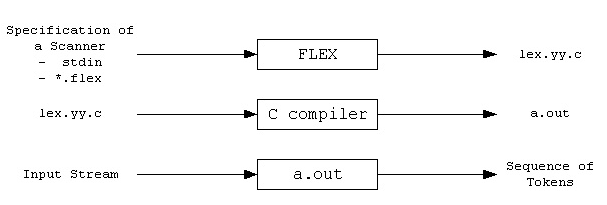

***Example 1: Count the number of characters in a string***

In [ ]:
/* Declaring two counters one for number
of lines other for number of characters */

%{
int no_of_lines = 0;
int no_of_chars = 0;
%}


/***rule 1 counts the number of lines,
rule 2 counts the number of characters
and rule 3 specifies when to stop
taking input***/


%%
\n  ++no_of_lines;
.     ++no_of_chars;
end    return 0;
%%



/*** User code section***/

int yywrap(){}
int main(int argc, char **argv)
{

yylex();
printf("number of lines = %d, number of chars = %d\n",
    no_of_lines, no_of_chars );

return 0;
}

SyntaxError: ignored

**2. Bison**

Bison is a general purpose parser generator that converts a grammar description for an LALR(1) context-free grammar into a C program to parse that grammar. The It's a bottom-up parser and it works, by shifts and reductions, to reduce the entire input down to a single grouping whose symbol is the grammar's start-symbol.

The diagram below shows how bison works. It converts a grammar description for an LALR cont free grammar into a C program to parse that grammar. The bison Parser is a bottom up parser that tries by shifts and reductions to reduce the entire input down to a single grouping whose symbol is the grammars start symbol.

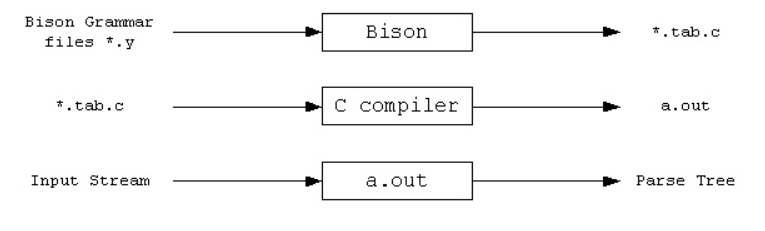





Simple Calculator Using Bison

In [ ]:
%{  
    #include <stdio.h>
    #include <assert.h>
    
    static int Pop();
    static int Top();
    static void Push(int val);
%}

%token T_Int

%%
S    :    S E '\n' { printf("= %d\n", Top()); }
     |    
     ;
     
E    :  E E '+' { Push(Pop() + Pop()); }
     |  E E '-' { int op2 = Pop(); Push(Pop() - op2); }
     |  E E '*' { Push(Pop() * Pop()); }
     |  E E '/' { int op2 = Pop(); Push(Pop() / op2); }
     |  T_Int   { Push(yylval); }    
     ;
%%

static int stack[100], count = 0;

static int Pop(){
    assert(count > 0);
    return stack[--count];
}
static int Top(){
    assert(count > 0);
    return stack[count-1];
}
static void Push(int val){
    assert(count < sizeof(stack)/sizeof(*stack));
    stack[count++] = val;
}

int main(){
    return yyparse();
}

Creating Scanner For parser 

In [ ]:
%{  
    #include "y.tab.h"
%}
%%
[0-9]+    { 
              yylval = atoi(yytext); 
              return T_Int;
          }
[-+*/\n]  { 
              return yytext[0];
          }
.         { // ignore the rest }

**3. LEX**

Lex is a computer program that generates lexical analyzers.It is designed for lexical processing for character input stream. It is used with YACC parser generator. It accepts a high-level, problem oriented specification for character string matching and produces a program in a general purpose language which recognizes regular expressions.
It reads the input stream and produces the source code as output through implementing the lexical analyzer in the C program.


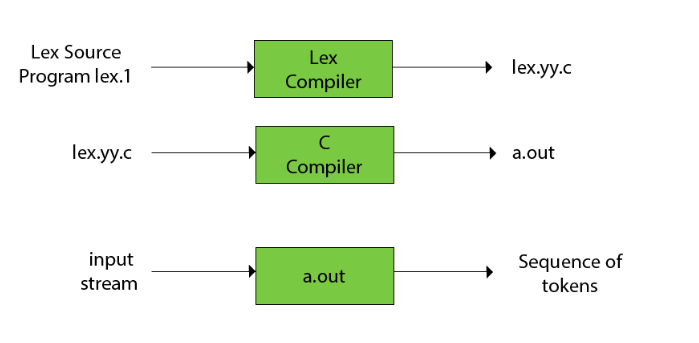

In [ ]:
%%
          int k;
[0-9]+   {
          k = atoi(yytext);
          if (k%7 == 0)
              printf("%d", k+3);
          else
              printf("%d",k);
          }

UsageError: Cell magic `%%` not found.


**4. Yacc -Yet Another Compiler Compiler**

YACC is an LALR(1) (LookAhead, Left-to-right, Rightmost derivation producer with 1 lookahead token) parser generator. It was originally designed for being complemented by lex. It uses grammar rules that allows it to analyze tokens and create a syntax tree. Yacc provides a general tool for describing the input to a computer program. The user specifies the structures of his input together with code to be invoked as each such structure is recognized. Yacc is written in portable C.

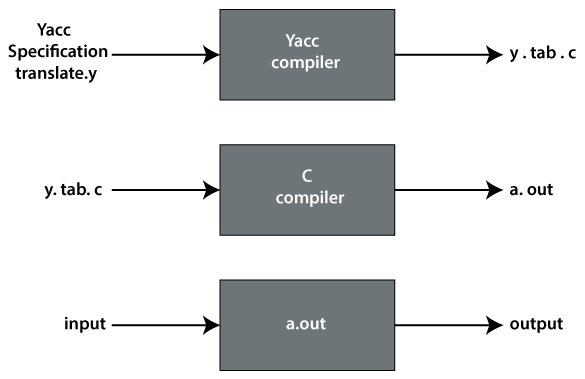

**YACC Program for Binary to Decimal Conversion**

Lexical Analyzer 

In [ ]:
%{
  /* Definition section */
  include<stdio.h>
  include<stdlib.h>
  include"y.tab.h"
  extern int yylval;
%}
  
 %%
 0 {yylval=0;return ZERO;}
 1 {yylval=1;return ONE;}
   
 [ \t] {;}
 \n return 0;
 . return yytext[0];
%%
  
    
int yywrap()  
 {  
  return 1;  
 }  

Parser Source Code

In [ ]:
%{

  void yyerror(char *s);
  
%}
%token ZERO ONE
  
/* Rule Section */
%%
N: L {printf("\n%d", $$);}
L: L B {$$=$1*2+$2;}
| B {$$=$1;}
B:ZERO {$$=$1;}
|ONE {$$=$1;};
%%
  
//driver code 
int main()
{
 while(yyparse());
 }
  
yyerror(char *s)
{
 fprintf(stdout, "\n%s", s);
}

# **Lab Activity 2**

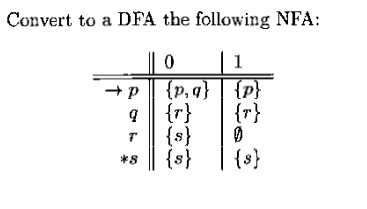

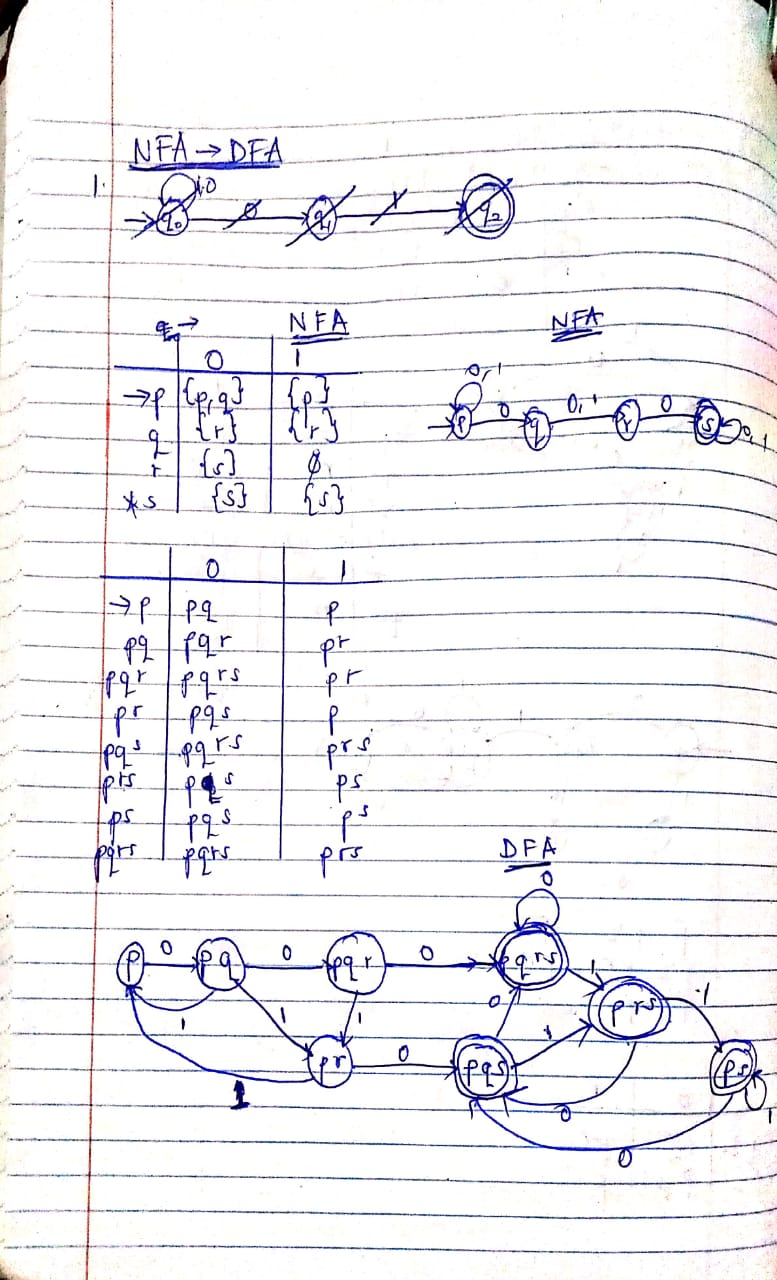

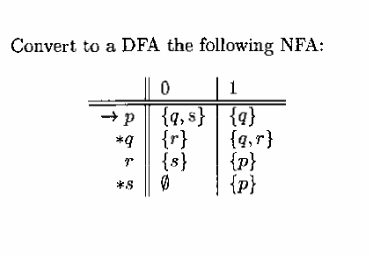

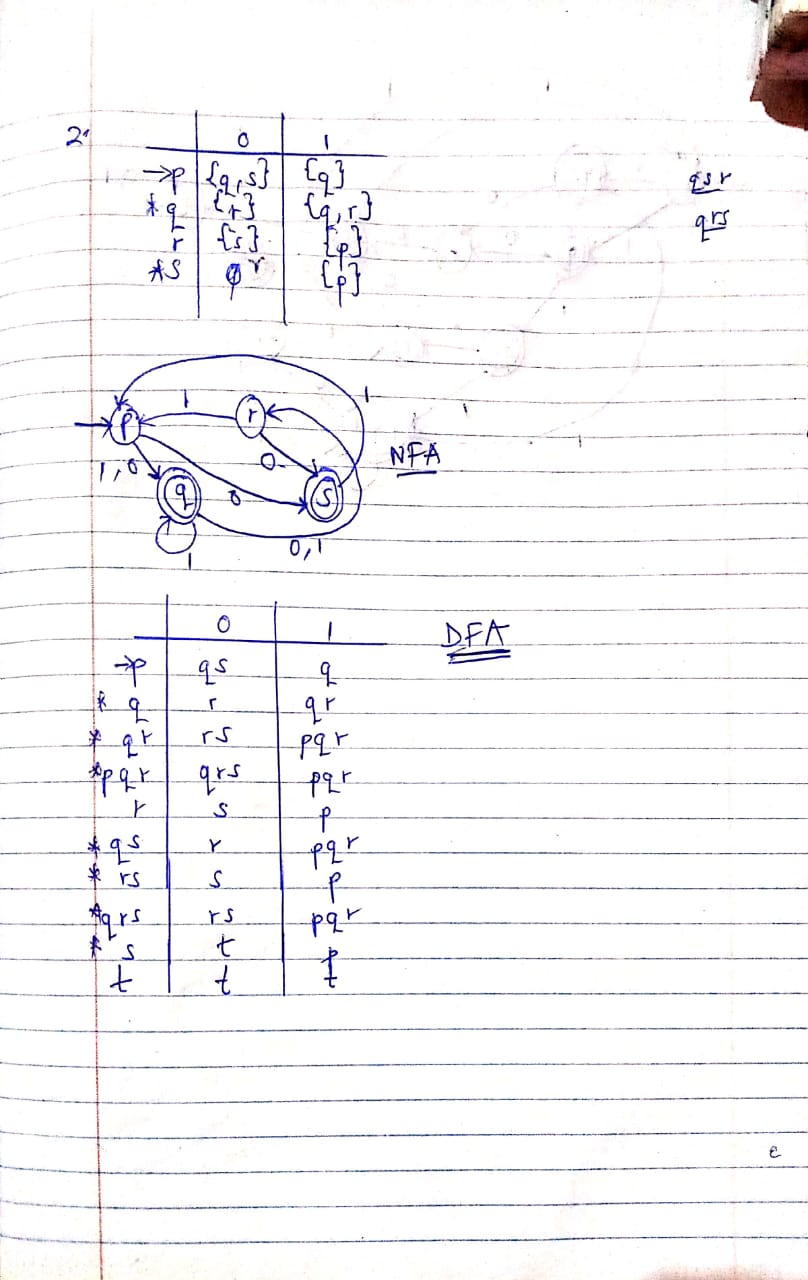

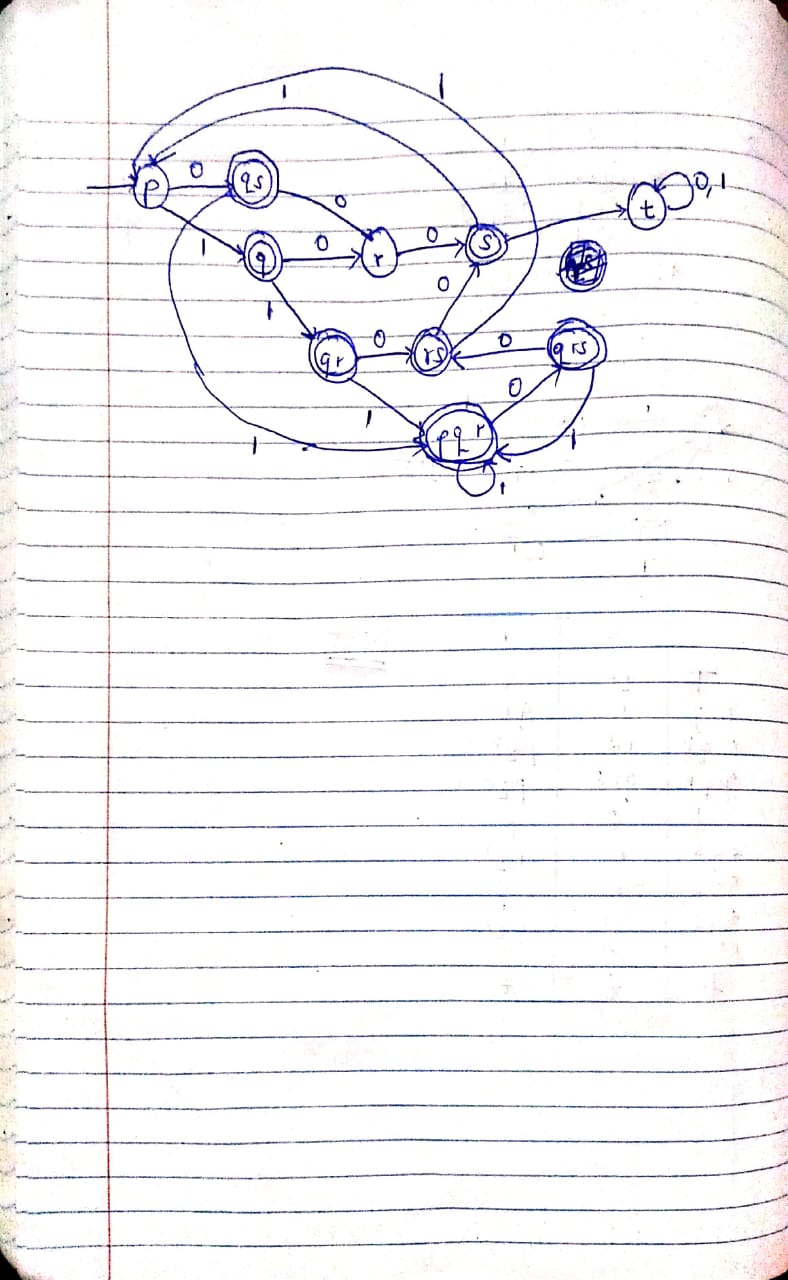

Using the material on E-Learning, show how to use Flex and Bison when building a simple lexical analyzer.


***Flex***


Regular expressions are used to specify the patterns in the scanner, while C code is used to specify the actions. The .l extension is used to identify specification files. You command flex on a.l file and produces the source file lex.yy.c, which is made up of a large amount of unfamiliar C code that implements an FA and includes the action code as well as all of your rules you mentioned. One token will be scanned by the file's extern function yylex().You build a program scanner by compiling that C code normally and linking it with the Lex library. By default, the scanner reads from stdin and writes to stdout.
Linking with the lex library provides a simple main that will repeatedly call yylex until it reaches EOF. To customize when tokens are scanned, you can alternatively compile and link the scanner into your project and use your own main.


***Bison***


The actual language-design process using Bison, from grammar specification to a working compiler or interpreter, has these parts:
Formally specify the grammar in a form recognized by Bison. For each grammatical rule in the language, describe the action that is to be taken when an instance of that rule is recognized. The action is described by a sequence of C statements.
Write a lexical analyzer to process input and pass tokens to the parser. The lexical analyzer may be written by hand in C. It could also be produced using Lex.
Write a controlling function that calls the Bison-produced parser.
Write error-reporting routines.
To turn this source code as written into a runnable program, you follow the steps:
Run Bison on the grammar to produce the parser.
Compile the code output by Bison, as well as any other source files.
Link the object files to produce the finished product.

# **Lab 3 Activity**

Determination of a valid credit number

In [ ]:
%option noyywrap
%{
/* *  DEFINITIONS *  */
%}

%{
// recognize whether or not a credit card number is valid
int line_num = 1;
%}

digit [0-9]
group {digit}{4}
%%

%{
/* * RULES  * */
%}
   /* The carat (^) says that a credit card number must start at the
      beginning of a line and the $ says that the credit card number
      must end the line. */
^{group}([ -]?{group}){3}$  { printf(" credit card number: %s\n", yytext); }

   /* The .* accumulates all the characters on any line that does not
      match a valid credit card number */
.* { printf("%d: error: %s \n", line_num, yytext); }
\n { line_num++; }
%%

/* * USER CODE  **/

int main(int argc, char *argv[]) {
  yylex();
}

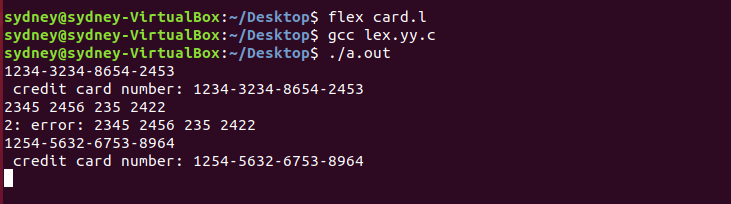

# **Lab 4 Activity**

1. ***Using an example or illustration, explain what is predictive parsing?***   
Predictive Parsing is the ability of a parser to predict the right production rule(s) to be used by the compiler to replace an input string. A predictive parser does not require backtracking or backup while choosing production rules.





Predictive Parsers accept **LL(k)** grammars.  
- L represents *`left-to-right scan of input.`*
- L represents *`left-most derivation.`*
- k represents *`number of tokens`*

    
`Following are the steps for constructing a predictive parser.` 

1. Removing the unreachable productions.
2. Removing the ambiguity from the Grammar.
3. Removing the left recursion.
4. Left Factoring of a grammar.
5. First and Follow
6. Constructing a parse table

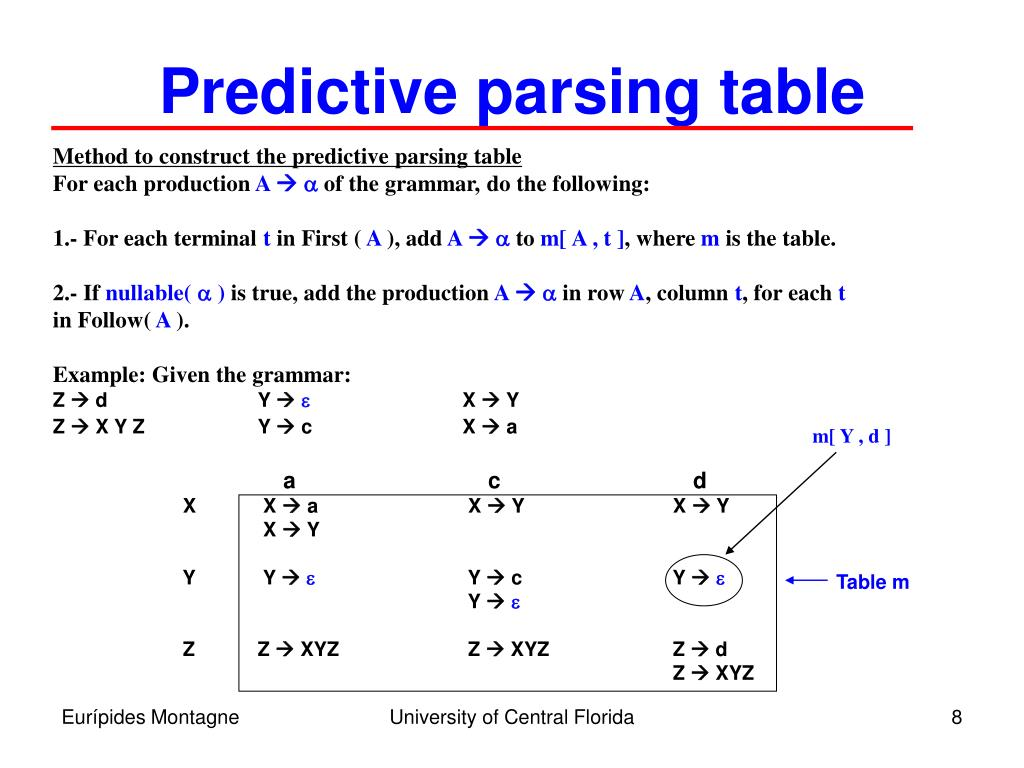

2. ***LL(1) Parsing***  
  **a.** LL(1) parsing is a top-down parsing method in the syntax analysis phase of compiler design.  Required components for LL(1) parsing are input string, a stack, parsing table for given grammar, and parser.

*b.* The ***First*** and ***Follow*** functions help to fill a predictive parser table. The ***First*** function helps to generate the beginning terminals whereas the ***Follow*** function generates the terminals on the immediate right.

3. ***Attributes of Top-Down Parsing***    
- Parsing starts from the root as it proceeds to the leaves of the parse tree.
- They are free from ambiguity




# **Lab 5 Activity**



1. **Review what syntax analysis is and in a few words, describe what this phase of compiler 
construction entails.** 


`Synatx Analysis` is the second phase of the compiler design process that comes after the lexical analysis. It reviews the syntaxical correctness of an input string whether it is the correct syntax syntax of the language in which the input hs been written.

- It starts by rebuilding a data structure called a `parse tree`. The parse tree is built by predefined grammar and the input string.
- If the input string can be produced by the parse tree then the input string is found to be the corrct syntax.
- If you can't produce the input string using the syntax tree, the error is reported to the syntax analyzer.
- The `Push down automata` is to design the analysis phase of the compiler design.
- In this phase, the `first` and the `follow` are selected before the parseing table is created.

2. **Using Flex (lexical analyzer) and Bison (yacc), show how one can develop a simple 
syntax analyzer. [Consult the web, show and explain the simple codes that you find]**

A **Syntax Analyzer** also known as a parser, takes input from a lexical analyzer in form of tokens streams.  The parser analyzes the source code (token stream) against the production rules to detect any errors in the code. The output of this phase is a parse tree or an error message.

The syntax analysis phase gets it's input from the lexical analysis phase in form of tokens. The tokens are verified if they follow rules of a specific language and generates a parse tree which are later passed to the next stage in the front-end process of the compiler.

**General Process of a syntax analyzer** 


Using Flex, we can easily be able to generate a lexer that can perform lexical analysis on a given source code to produce `streams of tokens`.

Using bison, a parser can be generated to perform `syntax analysis` on the streams of tokens produced and producing a parse tree if the tokens follow the syntax rules, `error messages` are produced if the tokens do not follow the syntax rules.

The parser mainly figures out the relationships between the tokens, A parser tree is the simplest way in which the relationships between the input tokens is displayed.

One of bison's greatest strengths, and also one of its most frustrating characteristics, is that it cannot interpret ambiguous grammar. 

This means that any parser developed by Bison will only accept a certain grammar that can be used to parse any input. An ambiguous because input like 1 - 2 + 3 could be interpreted as either 1 - (2+3) or (1-2) + 3, two distinct phrases with distinct values. Although there are a few instances (such as 1+2+3) where ambiguity is irrelevant, in most instances the ambiguity is actually a grammar mistake, and the sentence needs to be rectified.

Expressions clearly group to the left, thanks to the manner we wrote the grammar there. 

If a grammar is ambiguous, bison reports conflicts, places where there are two different possible parses for a given bit of input. It creates a parser anyway, picking one option in each conflict, but that choice means the language it’s parsing isn’t necessarily the one you tried to specify.

***Compling flex and bison together***

When building **syntax analyzer**, we build the scanner and the parser to work together such that the some parts in the scanner are called from the parser.

Bison creates a header file for us rather than calling it explicitly in the flex. The header include the  definition of the token numbers and the yylval()

*Example of simple calculator scanner file* ✅

fbl-4.l

In [ ]:
%{
# include "fb1-5.tab.h"
%}

%% 
"+"    { return ADD; }
"-"    { return SUB; }
"*"    { return MUL; }
"/"    { return DIV; }
"|"    { return ABS; }
[0-9]+ { yylval = atoi(yytext); return NUMBER; }
\n     { return EOL; }
[ \t]  { /* ignore whitespace */ }
.      { printf("Mystery character %c\n", *yytext); }
%%

 Simple calculator fb1-5.y

In [ ]:
/* simplest version of calculator */
%{
#include <stdio.h>
%}

/* declare tokens */
%token NUMBER
%token ADD SUB MUL DIV ABS
%token EOL

%%

calclist: /* nothing */                       matches at beginning of input
 | calclist exp EOL { printf("= %d\n", $2); } EOL is end of an expression
 ;

exp: factor       default $$ = $1 
 | exp ADD factor { $$ = $1 + $3; }
 | exp SUB factor { $$ = $1 - $3; }
 ;

factor: term       default $$ = $1 
 | factor MUL term { $$ = $1 * $3; }
 | factor DIV term { $$ = $1 / $3; }
 ;

term: NUMBER  default $$ = $1 
 | ABS term   { $$ = $2 >= 0? $2 : - $2; }
;
%%
main(int argc, char **argv)
{
  yyparse();
}

yyerror(char *s)
{
  fprintf(stderr, "error: %s\n", s);
}

Makefile

In [ ]:
# part of the makefile
fb1-5:  fb1-5.l fb1-5.y
        bison -d fb1-5.y
        flex fb1-5.l
        cc -o $@ fb1-5.tab.c lex.yy.c -lfl

First it runs bison with the -d (for “definitions” file) flag, which creates fb1-5.tab.c and fb1-5.tab.h, and it runs flex to create lex.yy.c. Then it compiles them together, along with the flex library. Try it out, and in particular verify that it handles operator precedence correctly, doing multiplication and division before addition and subtraction.

# **Lab 6 Activity**

Do a quick summary of the front end.
In this activity, use a string example e.g.  **x+2*y** to show the work
of the various phases of the front end.

 Quick Summary of the  Front End of Compiler Construction.

The front end is the initial stage for constructing a compiler and it constitutes different phases.  


*   Lexical Analysis
*   Syntax Analysis
*   Semantic Analysis
*   Intermediate Code Generation






 **Lexical Analysis**: It takes source program as input and produce tokens.

**Syntax Analysis**: It takes output of lexical analysis as input and produces a parse tree as output.

**Semantic Analysis** : It takes output of syntax analysis as input and produces a parse tree with type information as output. It checks for sematic errors.

**Intermediate code Generation**: It takes output of semantic analysis as input and produces intermediate code as output.

`Example  of a String`;  

$y+x^*z$ 

**`Symbol Table`**  

$y$ $->$ $1$  
$x$ $->$ $2$  
$z$ $->$ $3$ 


***Lexical analyser***  produces tokens  

$<id, 1>$ $<+>$ $<id,2>$ $<*>$ $<id,3>$

***Syntax analyser*** uses the tokens above to produce a parse tree.


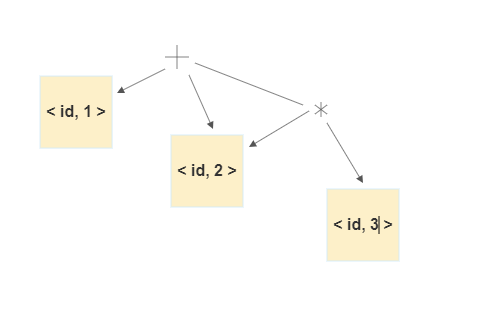

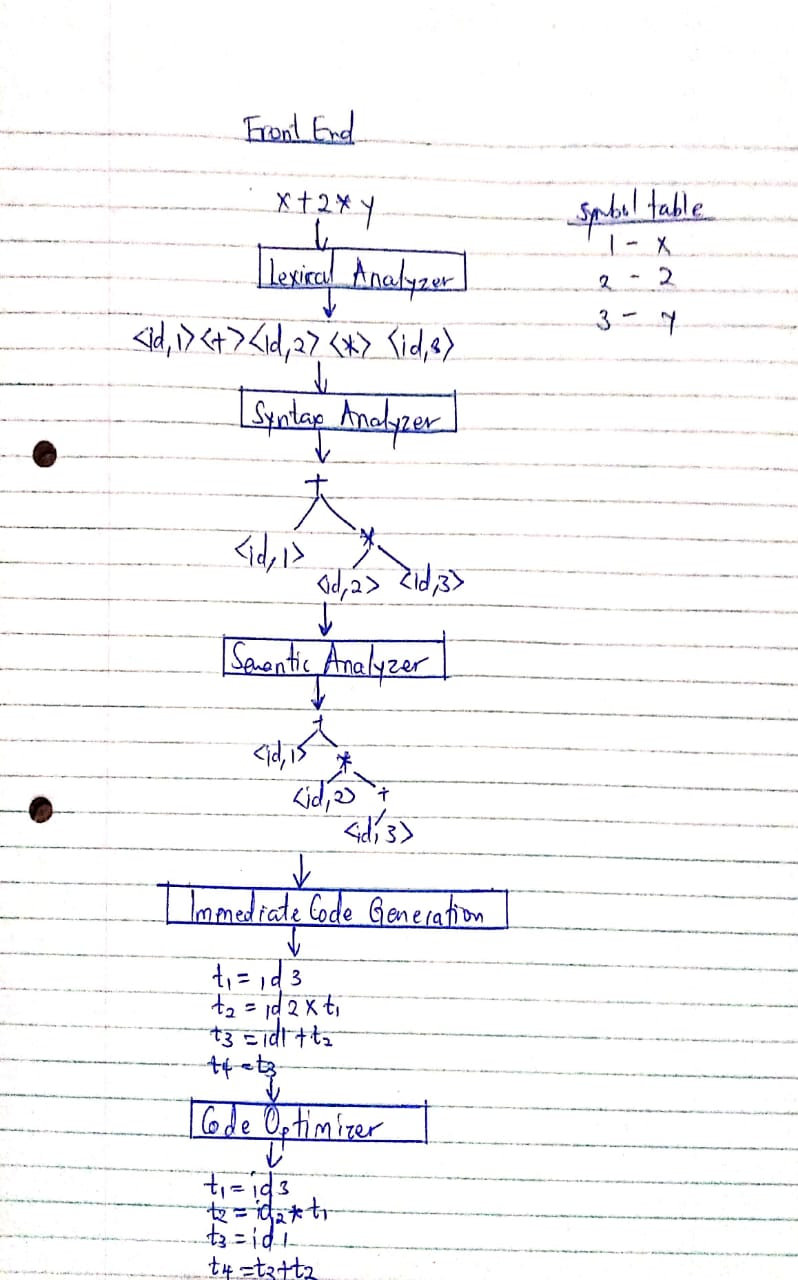

## **Lab Activity 7**

1. Write the three address code (TAC) of the following:

	a. Any if-statment of your choice

	b. Any for-loop of your choice

	c. Any while-loop of your choice
  
2. Write the triple implmenetation of one of the TAC's in question 1 above.

**References**

https://www.cs.cmu.edu/~wmh/bison.html

https://www.oreilly.com/library/view/flex-bison/9780596805418/ch01.html

https://binaryterms.com/syntax-analysis.html

http://dlsiisv.fi.upm.es/traductores/Software/Flex-Bison.pdf

 
